# Space Missions Analysis

## Introduction and Setup

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [58]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [59]:
# %pip install --upgrade plotly

### Import Statements

In [60]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [61]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [62]:
df_data = pd.read_csv('mission_launches.csv')

## Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [63]:
df_data.shape

(4324, 9)

In [64]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [65]:
# convert date to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True).dt.tz_localize(None)

In [66]:
# convert the prices to numeric
df_data["Price"] = df_data["Price"].str.replace(",", "")

df_data["Price"] = pd.to_numeric(df_data["Price"])

In [67]:
df_data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3733,3733,3733,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan",1967-09-27 21:11:00,Proton K/Block D | Zond,StatusRetired,NaN,Failure
2782,2782,2782,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1976-09-03 09:20:00,Soyuz U | Cosmos 854,StatusRetired,NaN,Success
2438,2438,2438,RVSN USSR,"Site 86/1, Kapustin Yar, Russia",1980-12-05 00:00:00,Cosmos-3MRB (65MRB) | BOR-4 Shuttle,StatusRetired,NaN,Success
4247,4247,4247,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1960-10-11 20:33:00,Atlas-LV3 Agena-A | Samos 1,StatusRetired,NaN,Failure
4022,4022,4022,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1964-08-22 11:02:00,Cosmos-2I (63S1) | Cosmos 42 & 43,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [68]:
df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
178,Arianespace,"ELS, Guiana Space Centre, French Guiana, France",2018-12-19 16:37:00,Soyuz ST-A/Fregat-M | CSO 1,StatusActive,NaN,Success
258,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2018-03-31 03:22:00,Long March 4C | Gaofen-1 02-04,StatusActive,64.68,Success
4131,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1962-09-01 02:12:00,Molniya | 2MV-1 n†­2 (Venera 2),StatusRetired,NaN,Failure
277,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-01-25 22:20:00,Ariane 5 ECA | SES-14/GOLD & Al Yah-3,StatusActive,200.00,Partial Failure
3183,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1972-12-02 04:39:00,Molniya-M /Block L | Molniya-1 n†­30,StatusRetired,NaN,Success


In [69]:
df_data.duplicated().any()

True

In [70]:
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [71]:
df_data.drop_duplicates(inplace=True)

In [72]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Descriptive Statistics

In [73]:
df_data.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [74]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4323 non-null   object        
 1   Location        4323 non-null   object        
 2   Date            4323 non-null   datetime64[ns]
 3   Detail          4323 non-null   object        
 4   Rocket_Status   4323 non-null   object        
 5   Price           963 non-null    float64       
 6   Mission_Status  4323 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 270.2+ KB


## Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [75]:
launches_per_company = df_data["Organisation"].value_counts()
launches_per_company

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


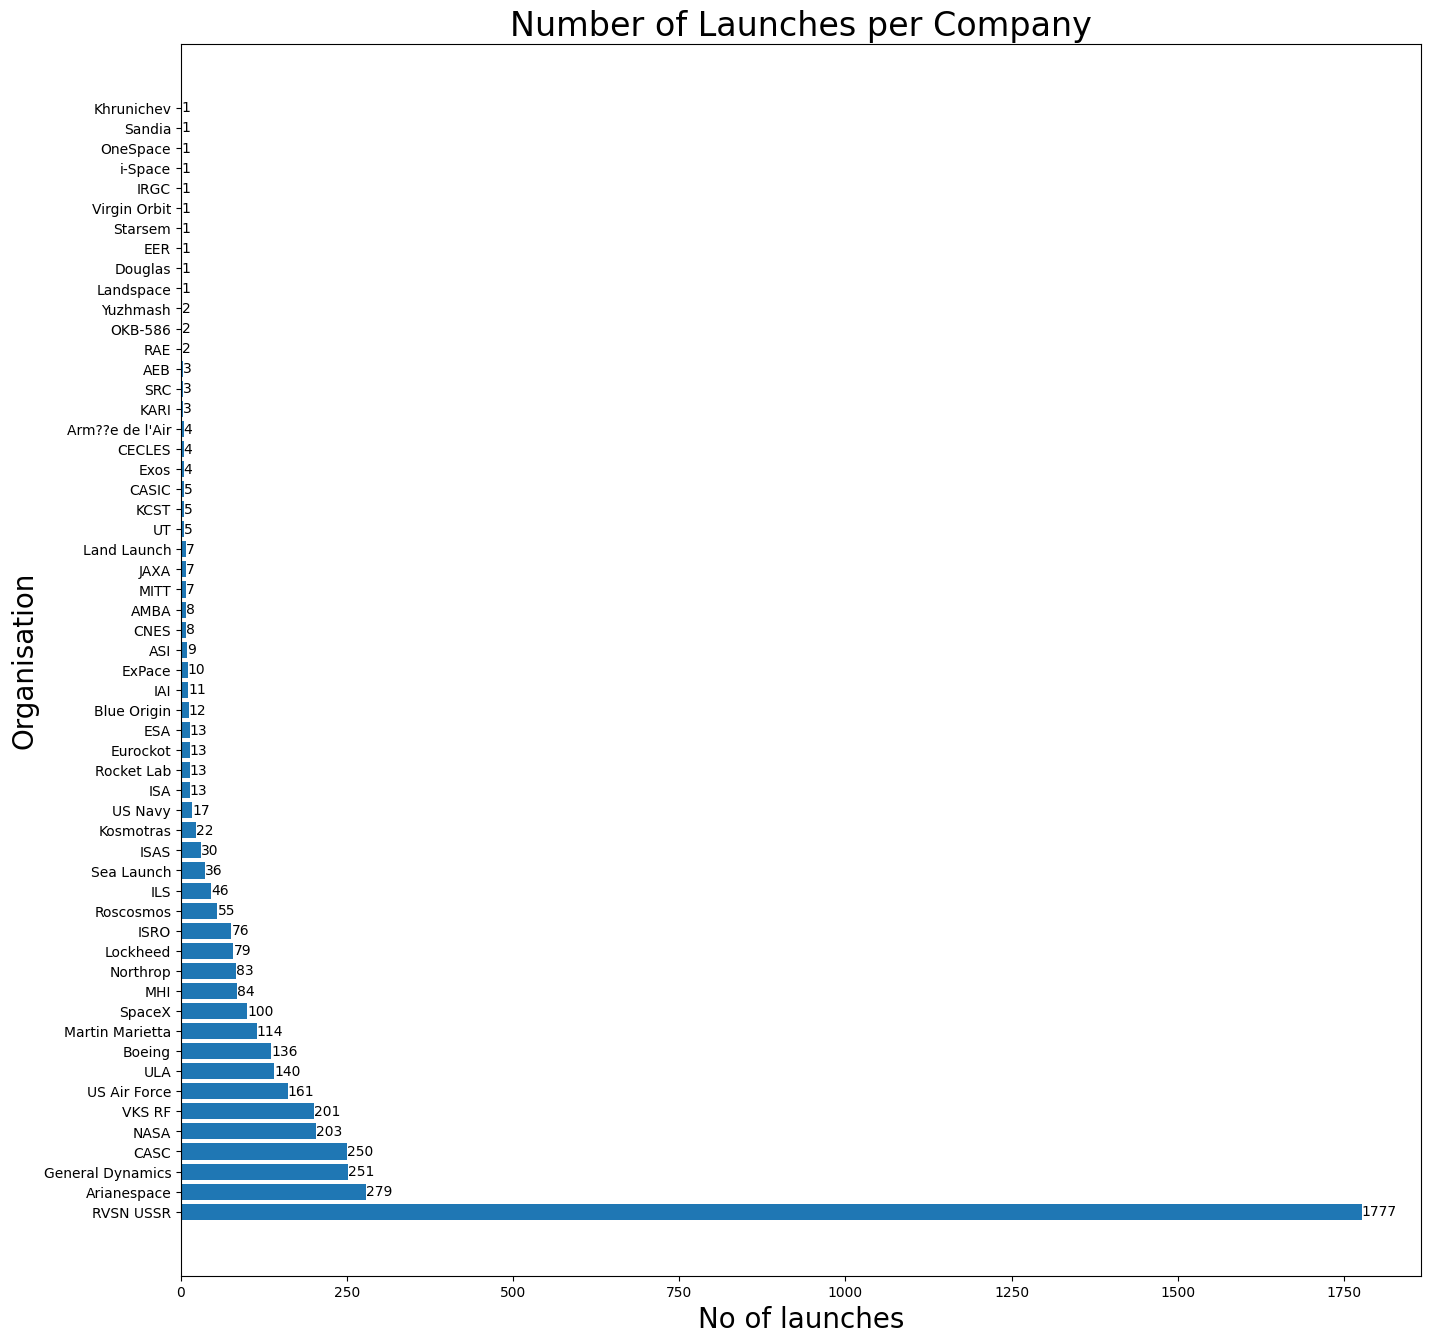

In [76]:
plt.figure(figsize=(16, 16))

plt.xlabel("No of launches", fontsize=20)
plt.ylabel("Organisation", fontsize=20)

plt.title("Number of Launches per Company", fontsize=24)

# Add values inside the bars
for index, value in enumerate(launches_per_company):
    plt.text(x=value, y=index, s=value, ha='left', va='center')

plt.barh(launches_per_company.index.values, launches_per_company.values)

plt.show()

## Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [77]:
rocket_status = df_data["Rocket_Status"].value_counts()
rocket_status

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

In [78]:
figure = px.pie(df_data, df_data["Rocket_Status"], title="Number of Active vs. Retired Rockets")

figure.show()

## Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [79]:
distribution_of_mission_status = df_data["Mission_Status"].value_counts()
distribution_of_mission_status

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [80]:
figure = px.pie(df_data, df_data["Mission_Status"], title="Distribution of Mission Status")

figure.show()

## How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [81]:
prices = df_data["Price"].dropna()

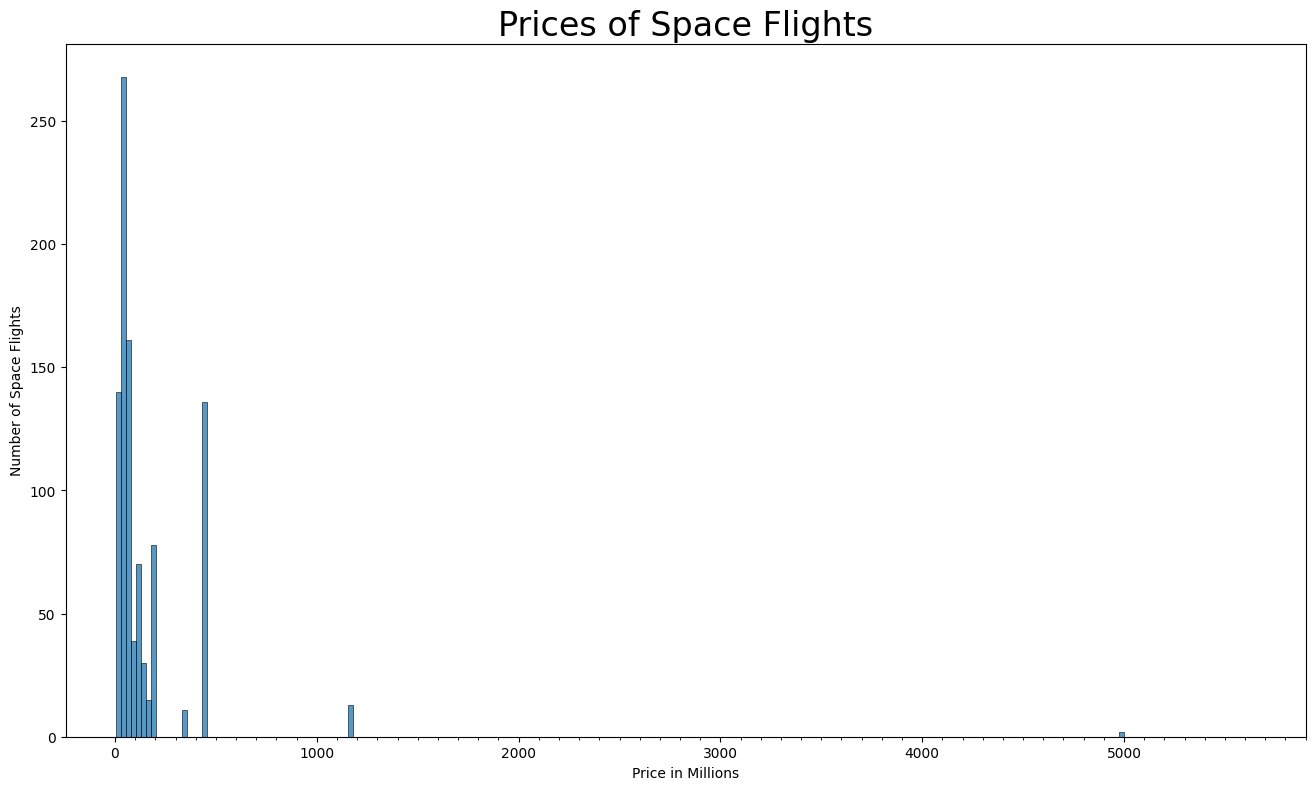

In [82]:
plt.figure(figsize=(16, 9))
sns.histplot(
    data=prices,
    x=prices.values,
    bins=200,
)

plt.title("Prices of Space Flights", fontsize=24)
plt.xlabel("Price in Millions")
plt.ylabel("Number of Space Flights")

# draw ticks for better visualization
major_ticks = [n * 1000 for n in range(6)]
minor_ticks = [n * 100 for n in range(60)]

plt.xticks(major_ticks)
plt.gca().set_xticks(minor_ticks, minor=True)

plt.show()

## Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [83]:
df_data["ISO_code"] = df_data["Location"].str.split(", ").str[-1]

In [84]:
country_name_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    # There were are additional places you have to account for
    'Iran' : 'Iran, Islamic Republic of',
    'South Korea' : 'Korea, Republic of',
    'North Korea' : 'Korea, Democratic People\'s Republic of',
    'Pacific Ocean' : 'Kiribati'
}

df_data["ISO_code"] = df_data["ISO_code"].replace(country_name_mapping)

df_data["ISO_code"]

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: ISO_code, Length: 4323, dtype: object

In [85]:
df_data["ISO_code"] = df_data["ISO_code"].apply(lambda x: countries.get(x).alpha3)

df_data["ISO_code"]

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Name: ISO_code, Length: 4323, dtype: object

In [86]:
df_countries = df_data["ISO_code"].value_counts()

df_countries

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     268
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: ISO_code, dtype: int64

In [87]:
world_map = px.choropleth(df_countries,
                          locations=df_countries.index,
                          color=df_countries.values, 
                          hover_name=df_countries.index, 
                          color_continuous_scale=px.colors.sequential.YlOrRd)
 
world_map.update_layout(coloraxis_showscale=True)
 
world_map.show()

## Use a Choropleth Map to Show the Number of Failures by Country

In [88]:
df_mission_failures = df_data.query("Mission_Status == 'Failure'")["ISO_code"].value_counts()

df_mission_failures

USA    129
KAZ     72
RUS     63
CHN     19
FRA     13
JPN     10
IRN      8
IND      8
KIR      3
PRK      3
AUS      3
NZL      2
KOR      2
ISR      2
BRA      2
Name: ISO_code, dtype: int64

In [89]:
world_map = px.choropleth(df_mission_failures,
                          locations=df_mission_failures.index,
                          color=df_mission_failures.values, 
                          hover_name=df_mission_failures.index, 
                          color_continuous_scale=px.colors.sequential.Reds)
 
world_map.update_layout(coloraxis_showscale=True)
 
world_map.show()

## Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [90]:
df_burst_chart = df_data.groupby(by=['ISO_code', 'Organisation', 'Mission_Status'], as_index=False).agg({'Detail' : pd.Series.count})

In [91]:
burst = px.sunburst(df_burst_chart, 
                    path=['ISO_code', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Sunburst of Countries, Organisation and Mission Status',
                   )
 
burst.show()

## Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [92]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [93]:
# Remove unaccounted prices
df_money_spent_by_org = df_data[["Organisation", "Price"]].dropna()

df_money_spent_by_org = df_money_spent_by_org.groupby(by=['Organisation'], as_index=False).agg({'Price' : pd.Series.sum})

df_money_spent_by_org

,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,310.51"
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,"1,320.00"
8,ISRO,"2,177.00"
9,JAXA,168.00


In [94]:
fig = px.bar(df_money_spent_by_org,
             df_money_spent_by_org["Organisation"],
             df_money_spent_by_org["Price"])

fig.show()

## Analyse the Amount of Money Spent by Organisation per Launch

In [95]:
df_money_spent_by_org_per_launch = df_data[["Organisation", "Price"]].dropna()

df_money_spent_by_org_per_launch["No_Of_Launches"] = df_money_spent_by_org_per_launch["Organisation"]

df_money_spent_by_org_per_launch = df_money_spent_by_org_per_launch.groupby(by=['Organisation'], as_index=False).agg({"Price" : pd.Series.sum, "No_Of_Launches" : pd.Series.count})

df_money_spent_by_org_per_launch["Per_Launch"] = df_money_spent_by_org_per_launch["Price"] / df_money_spent_by_org_per_launch["No_Of_Launches"]

In [96]:
df_money_spent_by_org_per_launch

,Organisation,Price,No_Of_Launches,Per_Launch
0,Arianespace,"16,345.00",96,170.26
1,Boeing,"1,241.00",7,177.29
2,CASC,"6,310.51",157,40.19
3,EER,20.00,1,20.00
4,ESA,37.00,1,37.00
5,Eurockot,543.40,13,41.80
6,ExPace,28.30,1,28.30
7,ILS,"1,320.00",13,101.54
8,ISRO,"2,177.00",67,32.49
9,JAXA,168.00,3,56.00


In [97]:
fig = px.bar(df_money_spent_by_org_per_launch,
             df_money_spent_by_org_per_launch["Organisation"],
             df_money_spent_by_org_per_launch["Per_Launch"])

fig.update_layout(
    xaxis_title='Organization',
    yaxis_title='Price per Launch'
)

fig.show()

## Chart the Number of Launches per Year

In [98]:
no_of_launches_per_year =  df_data["Date"].dt.year.value_counts().sort_index(ascending=True)

no_of_launches_per_year

1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

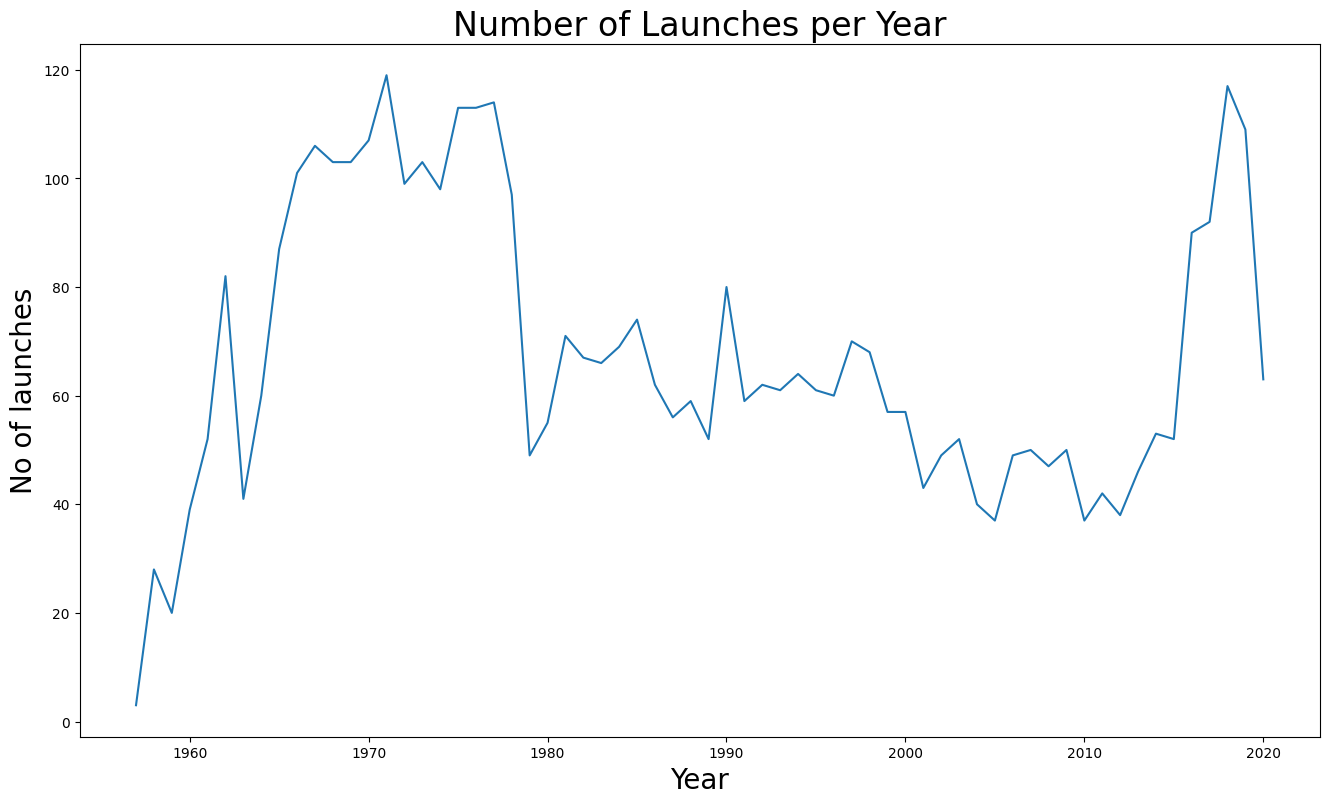

In [99]:
plt.figure(figsize=(16, 9))

plt.xlabel("Year", fontsize=20)
plt.ylabel("No of launches", fontsize=20)

plt.title("Number of Launches per Year", fontsize=24)

# # Add values inside the bars
# for index, value in enumerate(no_of_launches_per_year):
#     plt.text(x=value, y=index, s=value, ha='left', va='center')

plt.plot(no_of_launches_per_year.index, no_of_launches_per_year.values)

plt.show()

## Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [100]:
df_month_on_month = df_data["Date"].dt.strftime('%Y-%m').value_counts().reset_index().rename(columns={"index": "Date", "Date": "No_Of_Launches"}).sort_values("Date", ascending=True)

In [101]:
df_month_on_month["Date"] = pd.to_datetime(df_month_on_month['Date'], format='%Y-%m')

df_month_on_month

,Date,No_Of_Launches
746,1957-10-01,1
725,1957-11-01,1
724,1957-12-01,1
664,1958-02-01,2
573,1958-03-01,3
...,...,...
362,2020-04-01,5
131,2020-05-01,9
195,2020-06-01,7
12,2020-07-01,14


In [102]:
rolling_average = df_month_on_month["No_Of_Launches"].rolling(window=6).mean()

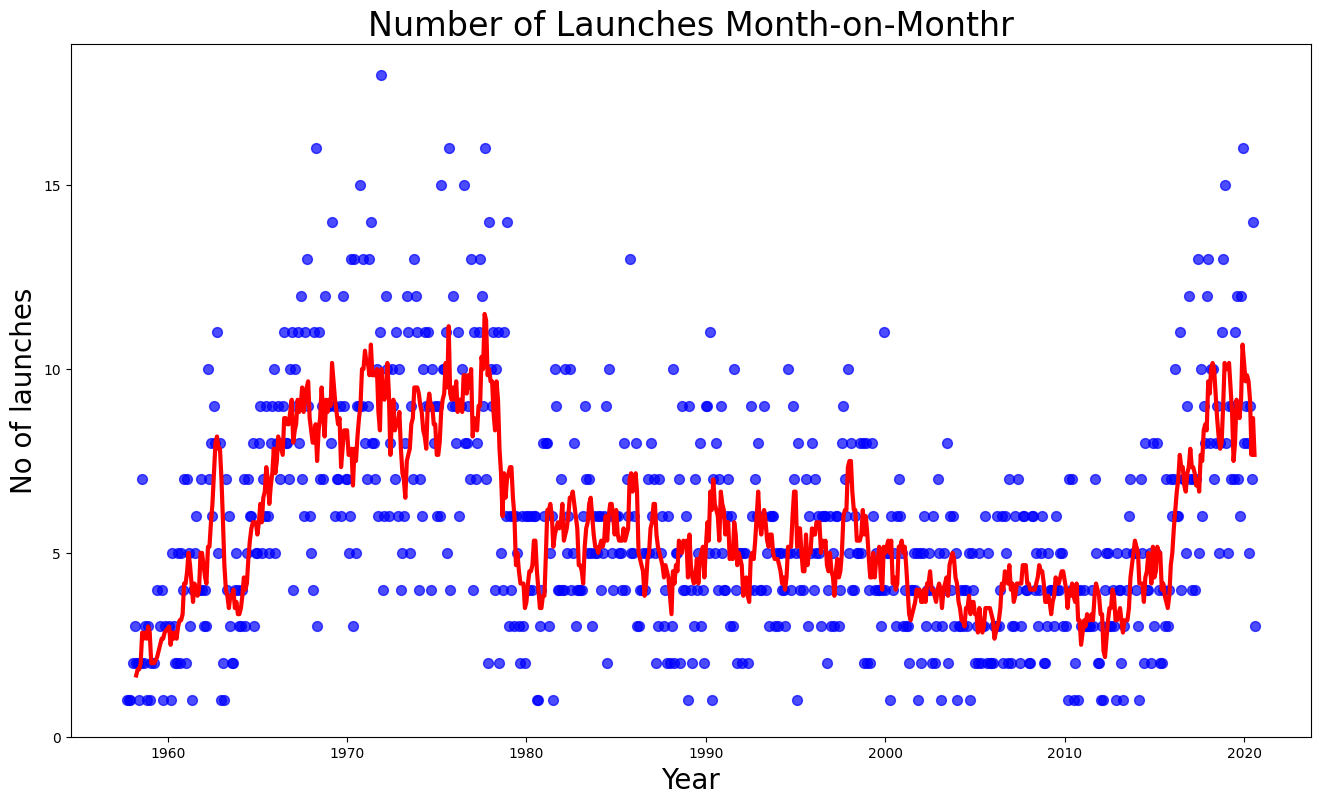

In [103]:
plt.figure(figsize=(16, 9))

plt.xlabel("Year", fontsize=20)
plt.ylabel("No of launches", fontsize=20)
plt.title("Number of Launches Month-on-Monthr", fontsize=24)

plt.scatter(df_month_on_month["Date"], df_month_on_month["No_Of_Launches"], c='blue', alpha=0.7, s=50)
plt.plot(df_month_on_month["Date"], rolling_average, linewidth=3, c="red")

plt.yticks([_ for _ in range(0, 20, 5)])
plt.show()

## Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [104]:
df_no_of_launches_months = df_data["Date"].dt.month.value_counts().reset_index().sort_values(by="index", ascending=True).rename(columns={"index": "Month", "Date": "No_Of_Launches"})

In [105]:
df_no_of_launches_months

,Month,No_Of_Launches
11,1,268
8,2,336
6,3,353
2,4,383
10,5,326
1,6,402
7,7,351
4,8,373
5,9,365
3,10,381


In [106]:
df_no_of_launches_months.min()["Month"]

1

In [107]:
df_no_of_launches_months.max()["Month"]

12

## How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [108]:
average_launch_price = df_data.dropna()
average_launch_price = average_launch_price.groupby(df_data['Date'].dt.year)['Price'].mean()

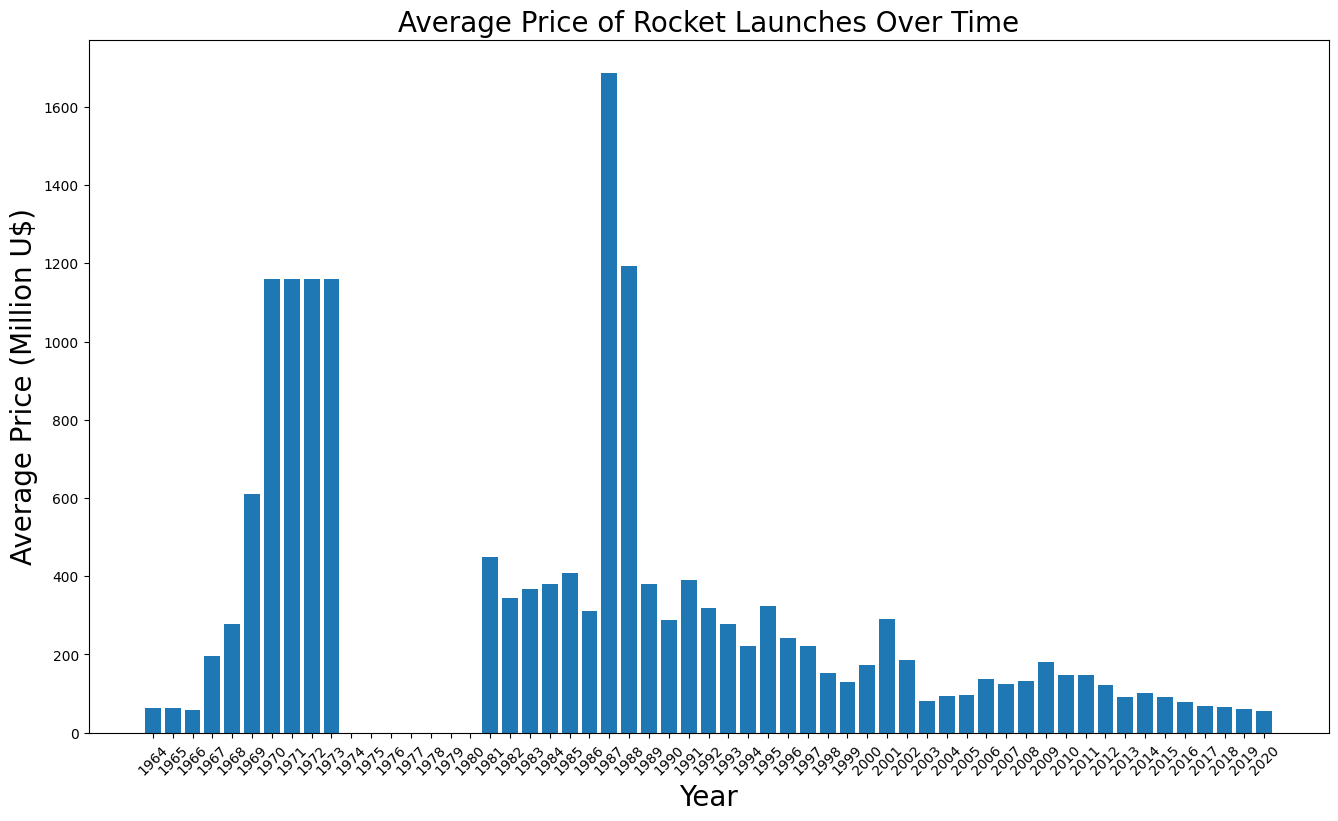

In [109]:
plt.figure(figsize=(16, 9))

plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Price (Million U$)', fontsize=20)
plt.title('Average Price of Rocket Launches Over Time', fontsize=20)

plt.bar(average_launch_price.index, average_launch_price.values)
plt.xticks(range(average_launch_price.index.min(), average_launch_price.index.max()+ 1), rotation=45)

plt.show()

## Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [231]:
org_launches_per_year = df_data.copy()[["Organisation", "Date"]]
org_launches_per_year["Date"] = org_launches_per_year["Date"].dt.year

org_launches_per_year

,Organisation,Date
0,SpaceX,2020
1,CASC,2020
2,SpaceX,2020
3,Roscosmos,2020
4,ULA,2020
...,...,...
4319,US Navy,1958
4320,AMBA,1958
4321,US Navy,1957
4322,RVSN USSR,1957


In [232]:
org_launches_per_year = org_launches_per_year.groupby(["Organisation", "Date"]).agg(Total_Launches=("Organisation", "count")).reset_index()

org_launches_per_year

,Organisation,Date,Total_Launches
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [239]:
top_10_orgs = org_launches_per_year.groupby("Organisation").agg({"Total_Launches" : pd.Series.count}).sort_values("Total_Launches", ascending=False).head(10).reset_index()

top_10_orgs

,Organisation,Total_Launches
0,CASC,47
1,NASA,46
2,MHI,42
3,RVSN USSR,39
4,Arianespace,37
5,General Dynamics,37
6,ISRO,31
7,Martin Marietta,30
8,Northrop,29
9,VKS RF,29


In [241]:
org_launches_per_year = org_launches_per_year.query("Organisation in @top_10_orgs['Organisation']")

org_launches_per_year

,Organisation,Date,Total_Launches
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6
...,...,...,...
654,VKS RF,2016,4
655,VKS RF,2017,6
656,VKS RF,2018,5
657,VKS RF,2019,8


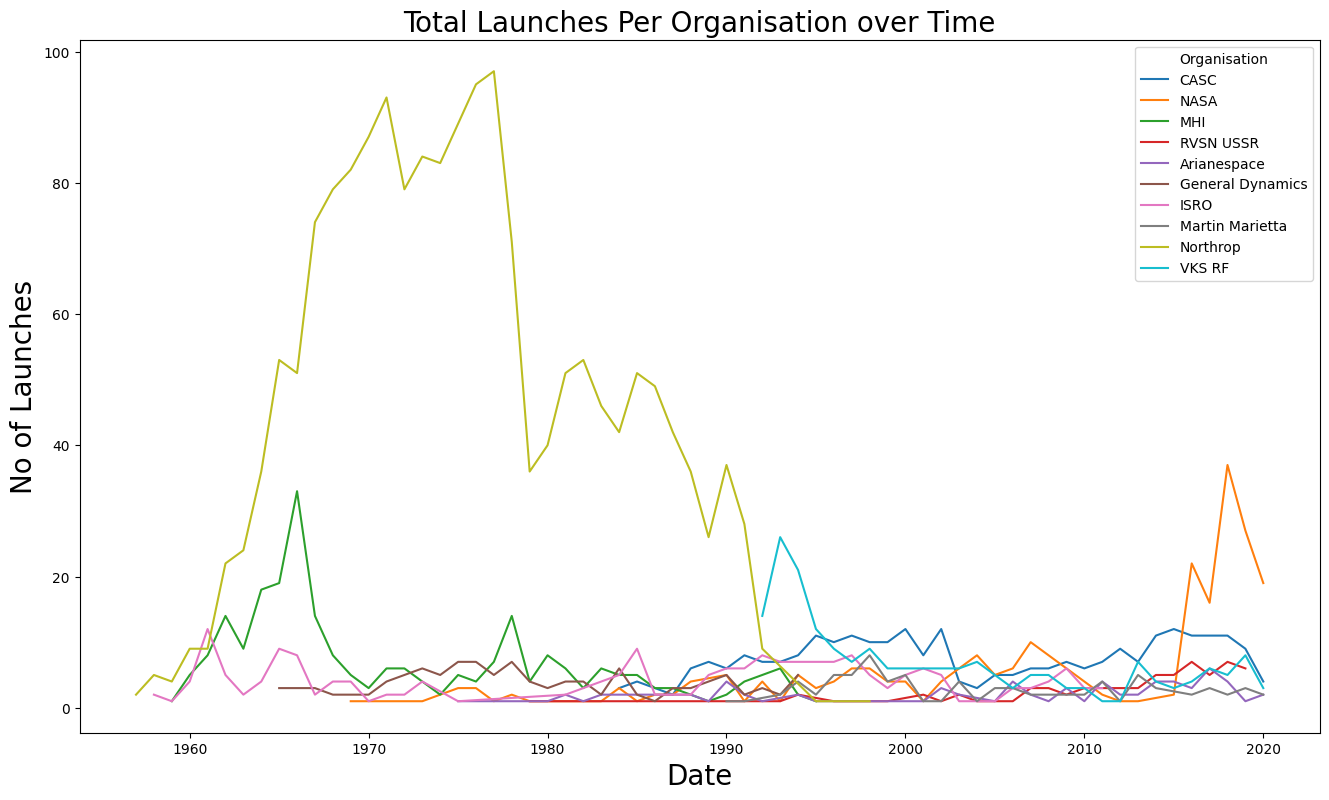

In [414]:
plt.figure(figsize=(16, 9))

plt.title('Total Launches Per Organisation over Time', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_year['Organisation'].unique():
    org_data = org_launches_per_year[org_launches_per_year["Organisation"] == org]
    plt.plot(org_data['Date'], org_data['Total_Launches'])

plt.legend(top_10_orgs["Organisation"], title='Organisation')

plt.show()

## Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [141]:
df_data["ISO_code"].unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KIR', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [161]:
df_USA = df_data.query("ISO_code == 'USA' and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)

df_USA

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_code
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA
...,...,...,...,...,...,...,...,...
1732,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-09-12 23:11:00,Space Shuttle Discovery | STS-48,StatusRetired,450.00,Success,USA
1726,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA",1991-11-08 07:07:00,Titan IV(403)A | SLDCOM & NOSS 3x,StatusRetired,NaN,Success,USA
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA


In [163]:
df_USSR = df_data.query("(ISO_code == 'RUS' or ISO_code == 'KAZ') and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)
df_USSR["ISO_code"] = "SUN"

df_USSR

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_code
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,SUN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,SUN
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,SUN
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,SUN
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,SUN
...,...,...,...,...,...,...,...,...
1728,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-10-10 14:00:00,Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,NaN,Success,SUN
1725,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1991-11-12 20:09:00,Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success,SUN
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,SUN
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,SUN


In [168]:
df_cold_war = pd.concat([df_USA, df_USSR]).sort_values("Date", ascending=True)

df_cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO_code
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,SUN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,SUN
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
...,...,...,...,...,...,...,...,...
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,SUN
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,SUN


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [355]:
cold_war_no_of_launches = df_cold_war.value_counts("ISO_code")

cold_war_no_of_launches

ISO_code
SUN    1770
USA     662
dtype: int64

In [177]:
figure = px.pie(names=cold_war_no_of_launches.index, values=cold_war_no_of_launches.values, title="No of Launches of the USA and USSR during the Cold War")

figure.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [202]:
launches_by_superpowers = df_cold_war.copy()[["Date", "ISO_code"]]
launches_by_superpowers["Date"] = launches_by_superpowers["Date"].dt.year

launches_by_superpowers

,Date,ISO_code
4323,1957,SUN
4322,1957,SUN
4321,1957,USA
4320,1958,USA
4319,1958,USA
...,...,...
1723,1991,SUN
1722,1991,USA
1721,1991,USA
1719,1991,SUN


In [205]:
launches_by_superpowers = launches_by_superpowers.groupby(["Date", "ISO_code"]).agg(Total_Launches=('Date', 'count')).reset_index()

launches_by_superpowers

,Date,ISO_code,Total_Launches
0,1957,SUN,2
1,1957,USA,1
2,1958,SUN,5
3,1958,USA,23
4,1959,SUN,4
...,...,...,...
65,1989,USA,16
66,1990,SUN,37
67,1990,USA,26
68,1991,SUN,29


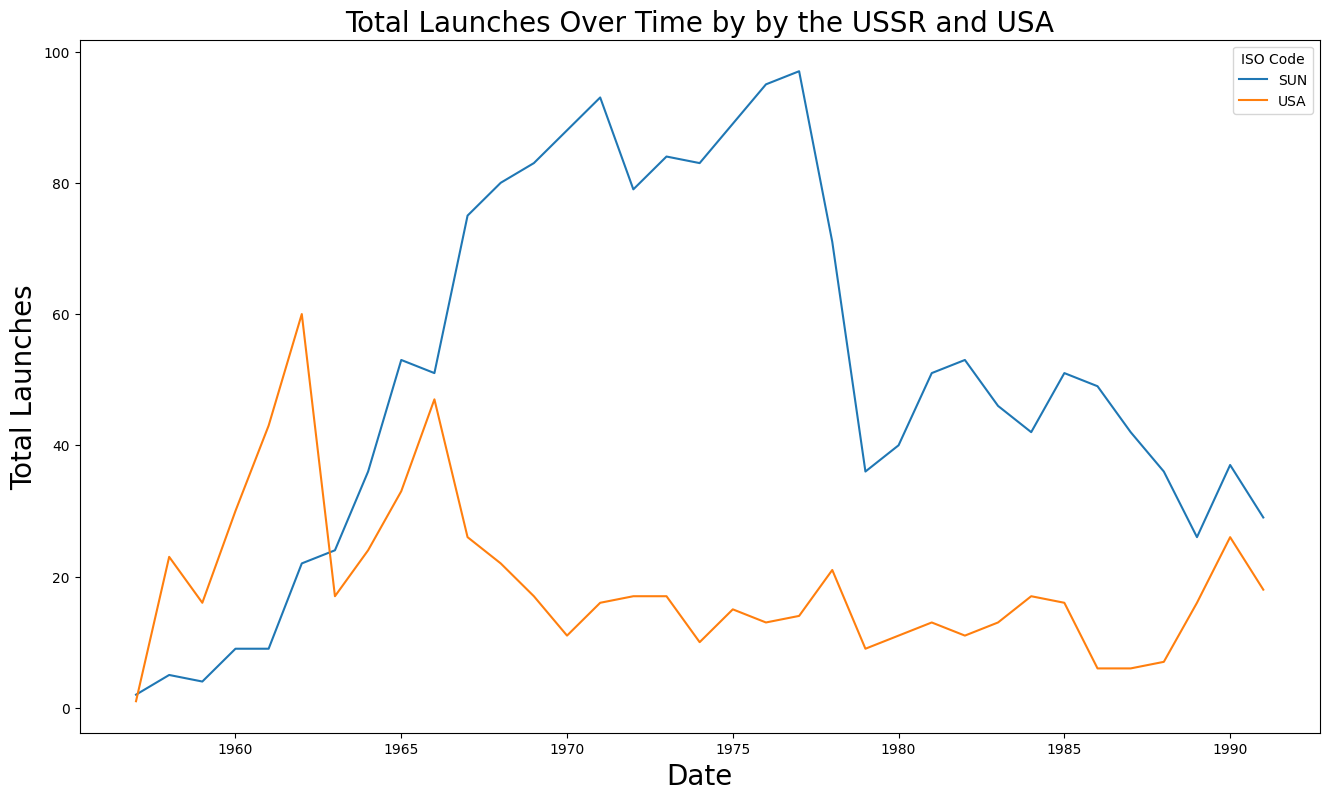

In [413]:
plt.figure(figsize=(16, 9))

plt.title('Total Launches Over Time by by the USSR and USA', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Launches', fontsize=20)

for iso_code in launches_by_superpowers['ISO_code'].unique():
    iso_data = launches_by_superpowers[launches_by_superpowers['ISO_code'] == iso_code]
    plt.plot(iso_data['Date'], iso_data['Total_Launches'])

plt.legend(launches_by_superpowers["ISO_code"].unique(), title='ISO Code')

plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [403]:
total_missions_per_year = df_data.copy()[["Date", "Mission_Status"]]

total_missions_per_year["Date"] = total_missions_per_year["Date"].dt.year

total_missions_per_year = total_missions_per_year.groupby("Date").agg(Total_Launches=('Date', 'count')).reset_index()

total_missions_per_year

,Date,Total_Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [404]:
failures_per_year = df_data.copy()[["Date", "Mission_Status"]].query("Mission_Status == 'Failure'")

failures_per_year["Date"] = failures_per_year["Date"].dt.year

failures_per_year = failures_per_year.groupby("Date").agg(Failures=('Date', 'count')).reset_index()

failures_per_year

,Date,Failures
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17
...,...,...
59,2016,2
60,2017,6
61,2018,2
62,2019,6


In [406]:
df_failures = pd.merge(total_missions_per_year, failures_per_year, on="Date")

df_failures

,Date,Total_Launches,Failures
0,1957,3,1
1,1958,28,20
2,1959,20,9
3,1960,39,20
4,1961,52,17
...,...,...,...
59,2016,90,2
60,2017,92,6
61,2018,117,2
62,2019,109,6


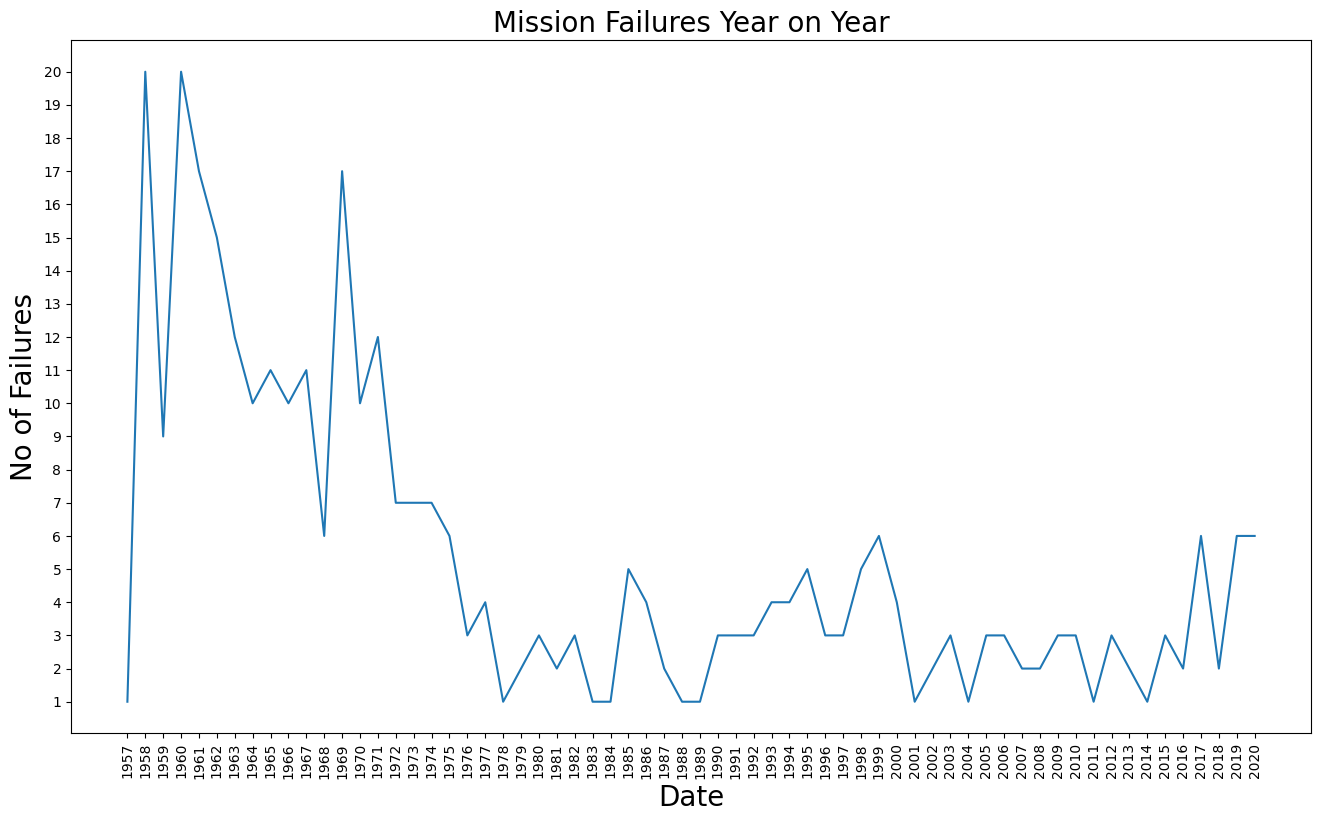

In [417]:
plt.figure(figsize=(16, 9))

plt.title('Mission Failures Year on Year', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Failures', fontsize=20)
plt.yticks(range(0, 21))
plt.xticks(df_failures["Date"], rotation=90)

plt.plot(df_failures["Date"], df_failures["Failures"])

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [418]:
df_failures["Failures_Percent"] = df_failures["Failures"] / df_failures["Total_Launches"]

df_failures["Failures_Percent"]

0    0.33
1    0.71
2    0.45
3    0.51
4    0.33
     ... 
59   0.02
60   0.07
61   0.02
62   0.06
63   0.10
Name: Failures_Percent, Length: 64, dtype: float64

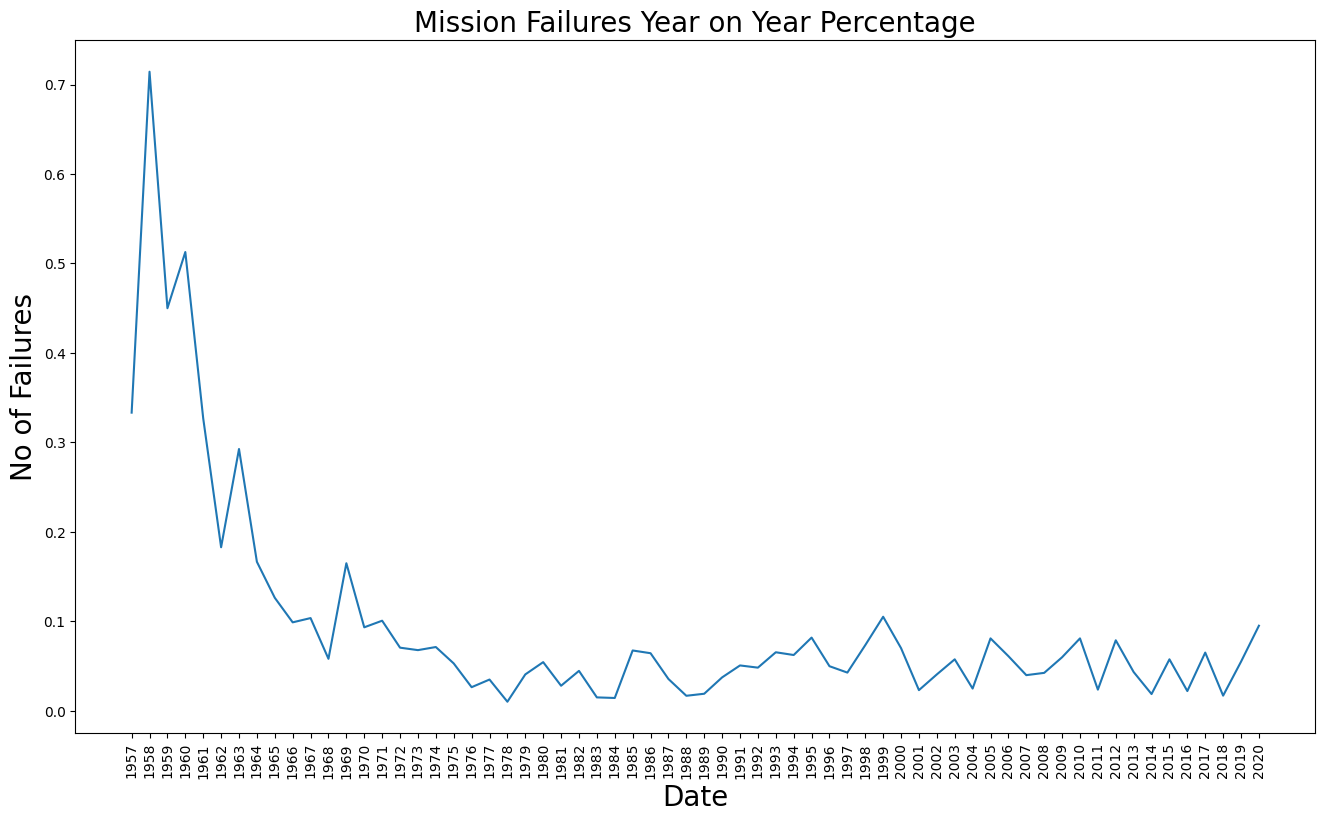

In [423]:
plt.figure(figsize=(16, 9))

plt.title('Mission Failures Year on Year Percentage', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Failures', fontsize=20)
plt.xticks(df_failures["Date"], rotation=90)

plt.plot(df_failures["Date"], df_failures["Failures_Percent"])

plt.show()

## For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020

Do the results change if we only look at the number of successful launches? 

In [431]:
countries_launches_per_year = df_data.copy()[["ISO_code", "Date"]]
countries_launches_per_year["Date"] = countries_launches_per_year["Date"].dt.year

countries_launches_per_year

,ISO_code,Date
0,USA,2020
1,CHN,2020
2,USA,2020
3,KAZ,2020
4,USA,2020
...,...,...
4319,USA,1958
4320,USA,1958
4321,USA,1957
4322,KAZ,1957


In [432]:
countries_launches_per_year = countries_launches_per_year.groupby(["ISO_code", "Date"]).agg(Total_Launches=("ISO_code", "count")).reset_index()

countries_launches_per_year

,ISO_code,Date,Total_Launches
0,AUS,1967,1
1,AUS,1968,1
2,AUS,1969,1
3,AUS,1970,2
4,AUS,1971,1
...,...,...,...
422,USA,2016,27
423,USA,2017,30
424,USA,2018,34
425,USA,2019,27


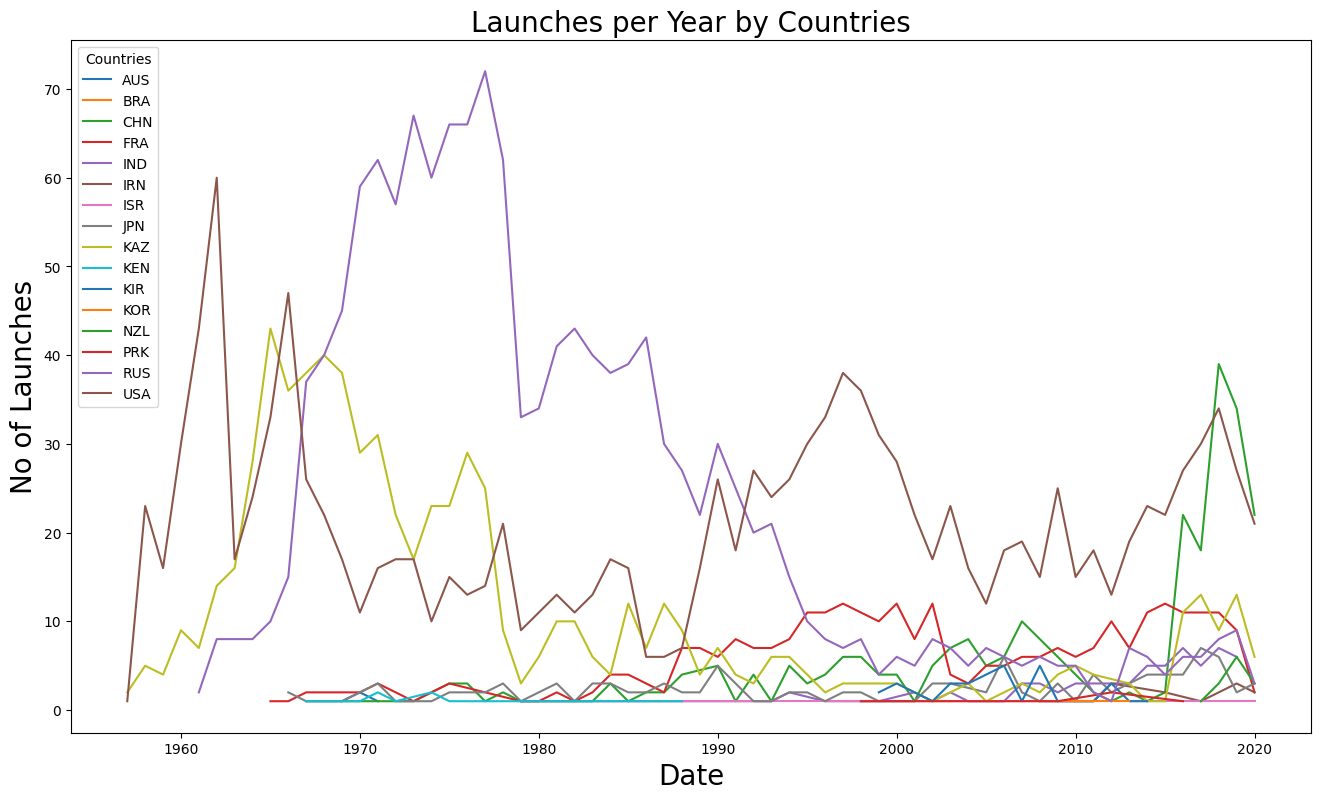

In [433]:
plt.figure(figsize=(16, 9))

plt.title('Launches per Year by Countries', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for country in countries_launches_per_year['ISO_code'].unique():
    country_data = countries_launches_per_year[countries_launches_per_year["ISO_code"] == country]
    plt.plot(country_data['Date'], country_data['Total_Launches'])

plt.legend(countries_launches_per_year["ISO_code"].unique(), title='Countries')

plt.show()

For if we car considering only successful missions:

In [438]:
countries_launches_per_year_successful = df_data.copy()[["ISO_code", "Date", "Mission_Status"]]
countries_launches_per_year_successful["Date"] = countries_launches_per_year_successful["Date"].dt.year

countries_launches_per_year_successful = countries_launches_per_year_successful.query("Mission_Status == 'Success'")

countries_launches_per_year_successful

,ISO_code,Date,Mission_Status
0,USA,2020,Success
1,CHN,2020,Success
2,USA,2020,Success
3,KAZ,2020,Success
4,USA,2020,Success
...,...,...,...
4316,USA,1958,Success
4317,USA,1958,Success
4320,USA,1958,Success
4322,KAZ,1957,Success


In [439]:
countries_launches_per_year_successful = countries_launches_per_year_successful.groupby(["ISO_code", "Date"]).agg(Total_Launches=("ISO_code", "count")).reset_index()

countries_launches_per_year_successful

,ISO_code,Date,Total_Launches
0,AUS,1967,1
1,AUS,1968,1
2,AUS,1971,1
3,CHN,1970,1
4,CHN,1971,1
...,...,...,...
381,USA,2016,26
382,USA,2017,30
383,USA,2018,33
384,USA,2019,24


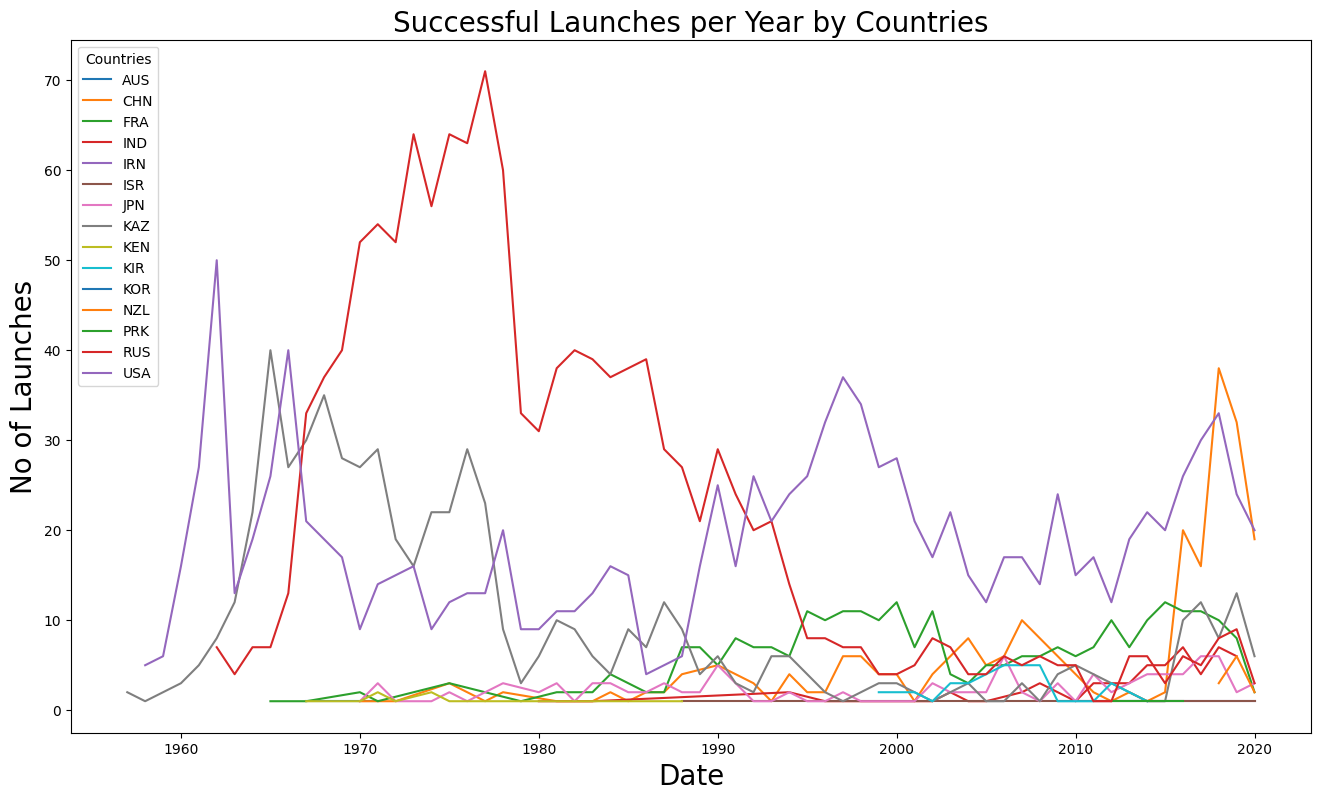

In [440]:
plt.figure(figsize=(16, 9))

plt.title('Successful Launches per Year by Countries', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for country in countries_launches_per_year_successful['ISO_code'].unique():
    country_data = countries_launches_per_year_successful[countries_launches_per_year_successful["ISO_code"] == country]
    plt.plot(country_data['Date'], country_data['Total_Launches'])

plt.legend(countries_launches_per_year_successful["ISO_code"].unique(), title='Countries')

plt.show()

## Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [444]:
org_launches_per_year = df_data.copy()[["Organisation", "Date"]]
org_launches_per_year["Date"] = org_launches_per_year["Date"].dt.year

org_launches_per_year

,Organisation,Date
0,SpaceX,2020
1,CASC,2020
2,SpaceX,2020
3,Roscosmos,2020
4,ULA,2020
...,...,...
4319,US Navy,1958
4320,AMBA,1958
4321,US Navy,1957
4322,RVSN USSR,1957


In [445]:
org_launches_per_year = org_launches_per_year.groupby(["Organisation", "Date"]).agg(Total_Launches=("Organisation", "count")).reset_index()

org_launches_per_year

,Organisation,Date,Total_Launches
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


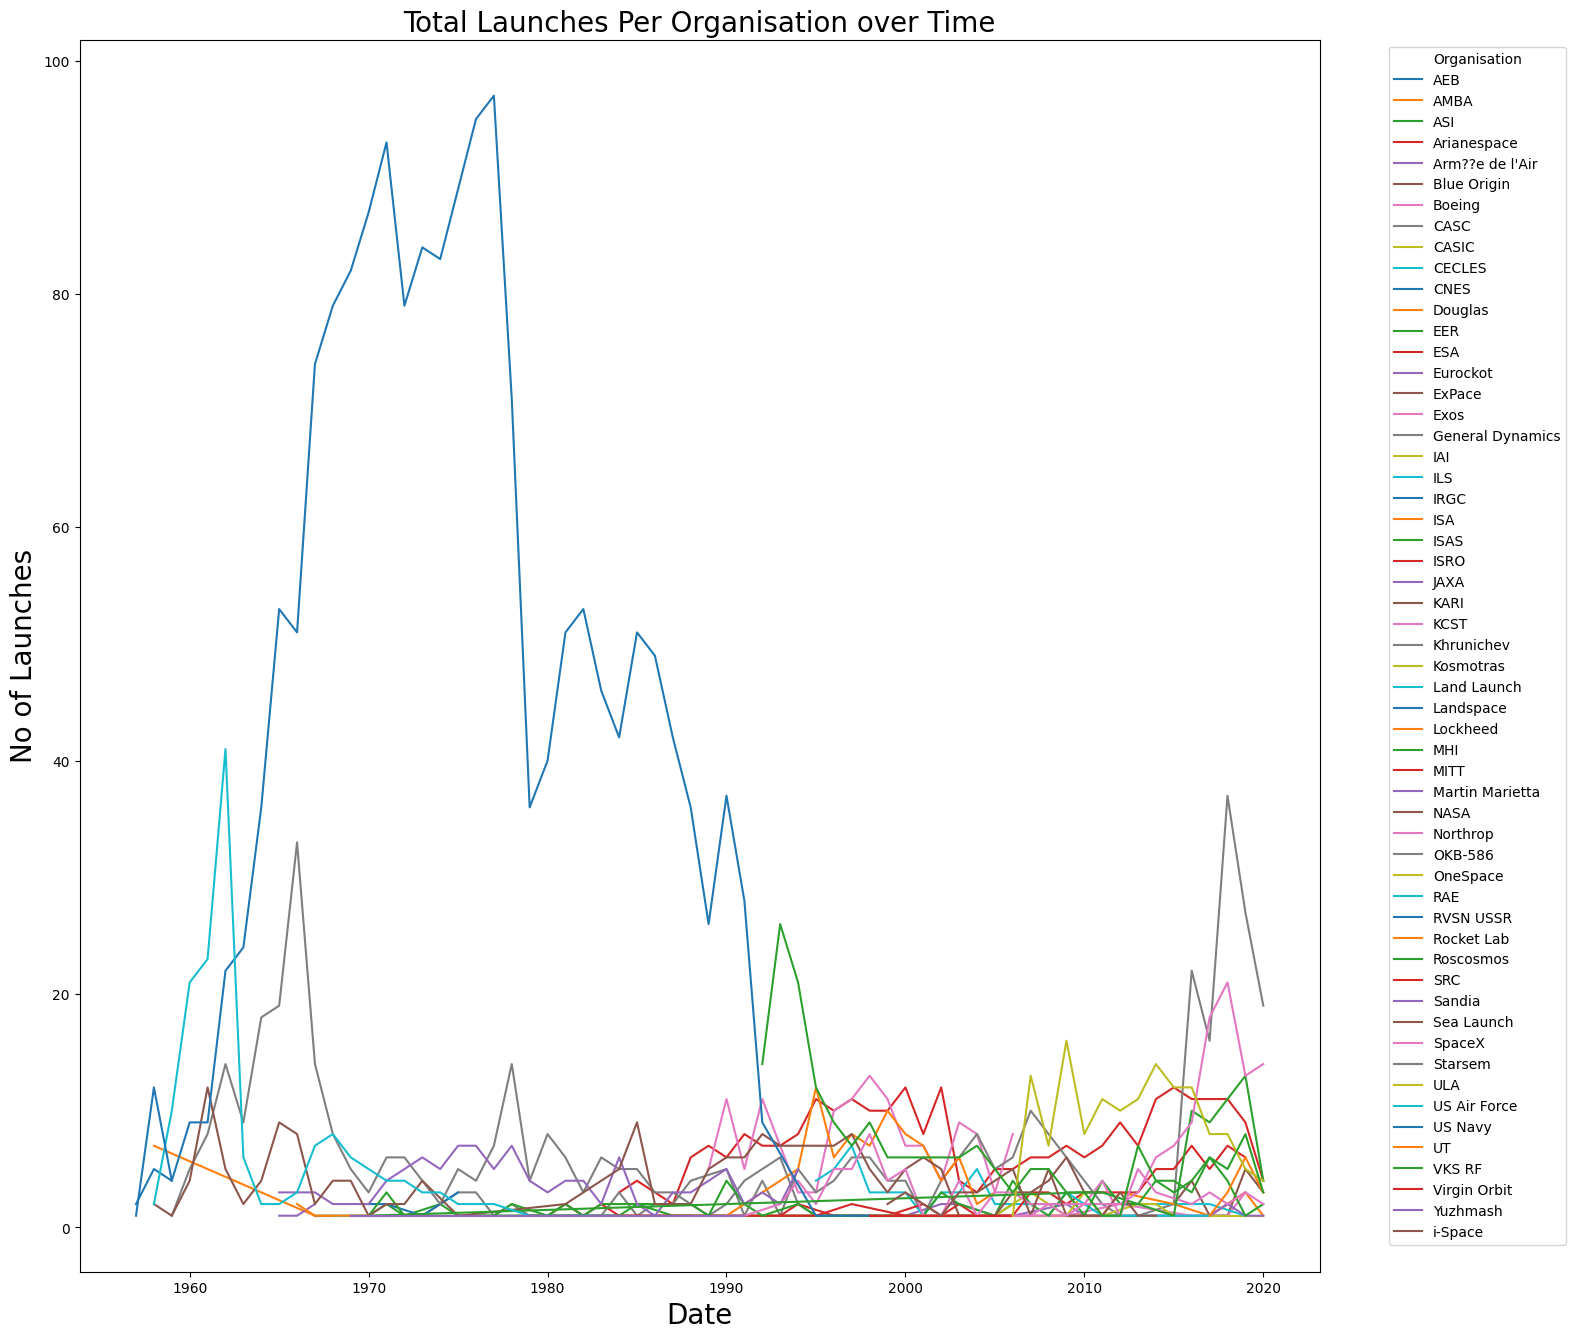

In [452]:
plt.figure(figsize=(16, 16))

plt.title('Total Launches Per Organisation over Time', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_year['Organisation'].unique():
    org_data = org_launches_per_year[org_launches_per_year["Organisation"] == org]
    plt.plot(org_data['Date'], org_data['Total_Launches'])

plt.legend(org_launches_per_year["Organisation"].unique(), title='Organisation', bbox_to_anchor=(1.05, 1))

plt.show()